In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
# Preprocessing
def remove_gravity(accel_data, cutoff_freq, fs):
    dt = 1/fs
    b, a = signal.butter(2, 2 * cutoff_freq * dt, btype='highpass', analog=False)
    accel_data_filtered = signal.filtfilt(b, a, accel_data, axis=0)
    gravity_data = signal.filtfilt(b, a, accel_data_filtered, axis=0)
    user_accel_data = accel_data_filtered - gravity_data
    return user_accel_data

In [3]:
# Feature extraction
def extract_features(user_accel_data):
    features = []
    for axis in range(user_accel_data.shape[1]):
        mean = np.mean(user_accel_data[:, axis])
        var = np.var(user_accel_data[:, axis])
        correlation = np.corrcoef(user_accel_data[:, axis], rowvar=False)[0, 1]
        freq, psd = signal.welch(user_accel_data[:, axis], fs=5, nperseg=256)
        psd_feature = np.sum(psd[(freq > 0.5) & (freq < 3)])
        features.extend([mean, var, correlation, psd_feature])
    return np.array(features)

In [6]:
data = "-0.322,0.416,0.913;-0.322,0.416,0.913;-0.322,0.416,0.913;-0.316,0.384,0.911;-0.316,0.384,0.911;-0.316,0.384,0.911;-0.299,0.366,0.918;-0.299,0.366,0.918;-0.299,0.366,0.918;-0.323,0.226,0.965;-0.323,0.226,0.965;-0.323,0.226,0.965;-0.356,0.141,0.948;-0.356,0.141,0.948;-0.356,0.141,0.948;-0.357,0.111,0.934;-0.357,0.111,0.934;-0.357,0.111,0.934;-0.351,0.222,0.956;-0.351,0.222,0.956;-0.351,0.222,0.956;-0.411,0.207,0.937;-0.411,0.207,0.937;-0.411,0.207,0.937;-0.408,0.161,0.922;-0.408,0.161,0.922;-0.408,0.161,0.922;-0.424,0.16,0.916;-0.424,0.16,0.916;-0.424,0.16,0.916;-0.431,0.209,0.92;-0.431,0.209,0.92;-0.431,0.209,0.92;-0.449,0.209,0.914;-0.449,0.209,0.914;-0.449,0.209,0.914;-0.451,0.223,0.916;-0.451,0.223,0.916;-0.451,0.223,0.916;-0.437,0.223,0.944;-0.437,0.223,0.944;-0.437,0.223,0.944;-0.429,0.237,0.958;-0.429,0.237,0.958;-0.429,0.237,0.958;-0.433,0.245,0.935;-0.433,0.245,0.935;-0.433,0.245,0.935;-0.457,0.235,0.948;-0.457,0.235,0.948;-0.457,0.235,0.948;-0.433,0.238,0.938;-0.433,0.238,0.938;-0.433,0.238,0.938;-0.46,0.207,0.917;-0.46,0.207,0.917;-0.46,0.207,0.917;-0.455,0.179,0.929;-0.455,0.179,0.929;-0.455,0.179,0.929;0.052,0.413,1.147;0.052,0.413,1.147;0.052,0.413,1.147;-0.025,0.158,1.068;-0.025,0.158,1.068;-0.025,0.158,1.068;-0.03,0.156,1.106;-0.03,0.156,1.106;-0.03,0.156,1.106;-0.045,0.197,0.988;-0.045,0.197,0.988;-0.045,0.197,0.988;0.047,0.023,0.71;0.047,0.023,0.71;0.047,0.023,0.71;0.42,-0.091,1.194;0.42,-0.091,1.194;0.42,-0.091,1.194;0.485,-0.048,1.191;0.485,-0.048,1.191;0.485,-0.048,1.191;0.339,0.129,1.193;0.339,0.129,1.193;0.339,0.129,1.193;0.03,0.035,0.963;0.03,0.035,0.963;0.03,0.035,0.963;0.109,0.071,0.865;0.109,0.071,0.865;0.109,0.071,0.865;0.623,0.522,1.466;0.623,0.522,1.466;0.623,0.522,1.466;0.477,0.752,1.395;0.477,0.752,1.395;0.477,0.752,1.395;0.159,0.64,1.406;0.159,0.64,1.406;0.159,0.64,1.406;0.136,0.445,1.096;0.136,0.445,1.096;0.136,0.445,1.096;0.249,0.332,0.861;0.249,0.332,0.861;0.249,0.332,0.861;0.104,0.25,0.722;0.104,0.25,0.722;0.104,0.25,0.722;-0.044,0.108,0.567;-0.044,0.108,0.567;-0.044,0.108,0.567;0.224,0.067,1.209;0.224,0.067,1.209;0.224,0.067,1.209;0.589,-0.249,1.608;0.589,-0.249,1.608;0.589,-0.249,1.608;0.171,-0.119,1.288;0.171,-0.119,1.288;0.171,-0.119,1.288;0.034,0.238,1.057;0.034,0.238,1.057;0.034,0.238,1.057;0.095,0.261,0.933;0.095,0.261,0.933;0.095,0.261,0.933;-0.201,0.081,0.835;-0.201,0.081,0.835;-0.201,0.081,0.835;-0.286,0.003,0.631;-0.286,0.003,0.631;-0.286,0.003,0.631;-0.013,0.104,0.893;-0.013,0.104,0.893;-0.013,0.104,0.893;0.564,0.814,1.581;0.564,0.814,1.581;0.564,0.814,1.581;0.388,0.996,1.01;0.388,0.996,1.01;0.388,0.996,1.01;-0.071,0.528,1.063;-0.071,0.528,1.063;-0.071,0.528,1.063;-0.179,0.222,1.072;-0.179,0.222,1.072;-0.179,0.222,1.072;-0.282,0.077,0.796;-0.282,0.077,0.796;-0.282,0.077,0.796;-0.261,0.195,0.536;-0.261,0.195,0.536;-0.261,0.195,0.536;0.098,0.241,1.009;0.098,0.241,1.009;0.098,0.241,1.009;0.54,0.218,1.458;0.54,0.218,1.458;0.54,0.218,1.458;0.468,0.093,1.276;0.468,0.093,1.276;0.468,0.093,1.276;-0.275,-0.01,0.835;-0.275,-0.01,0.835;-0.275,-0.01,0.835;-0.274,-0.3,0.776;-0.274,-0.3,0.776;-0.274,-0.3,0.776;-0.124,-0.332,0.806;-0.124,-0.332,0.806;-0.124,-0.332,0.806;0.187,0.08,1.253;0.187,0.08,1.253;0.187,0.08,1.253;0.434,0.585,1.43;0.434,0.585,1.43;0.434,0.585,1.43;-0.083,0.481,1.087;-0.083,0.481,1.087;-0.083,0.481,1.087;-0.217,0.384,1.096;-0.217,0.384,1.096;-0.217,0.384,1.096;-0.248,0.348,0.985;-0.248,0.348,0.985;-0.248,0.348,0.985;-0.303,0.293,0.808;-0.303,0.293,0.808;-0.303,0.293,0.808;-0.367,0.222,0.609;-0.367,0.222,0.609;-0.367,0.222,0.609;-0.234,0.117,0.865;-0.234,0.117,0.865;-0.234,0.117,0.865;-0.051,0.037,1.04;-0.051,0.037,1.04;-0.051,0.037,1.04;0.121,-0.159,1.479;0.121,-0.159,1.479;0.121,-0.159,1.479;-0.136,-0.006,1.258;-0.136,-0.006,1.258;-0.136,-0.006,1.258;-0.346,0.09,1.154;-0.346,0.09,1.154;-0.346,0.09,1.154;-0.366,-0.016,1.002;-0.366,-0.016,1.002;-0.366,-0.016,1.002;-0.458,-0.079,0.776;-0.458,-0.079,0.776;-0.458,-0.079,0.776;-0.345,-0.015,0.629;-0.345,-0.015,0.629;-0.345,-0.015,0.629;-0.25,-0.042,0.604;-0.25,-0.042,0.604;-0.25,-0.042,0.604;-0.216,0.12,0.713;-0.216,0.12,0.713;-0.216,0.12,0.713;-0.017,0.436,1.255;-0.017,0.436,1.255;-0.017,0.436,1.255;0.177,0.48,1.463;0.177,0.48,1.463;0.177,0.48,1.463;-0.044,0.27,1.273;-0.044,0.27,1.273;-0.044,0.27,1.273;-0.292,0.298,1.187;-0.292,0.298,1.187;-0.292,0.298,1.187;-0.477,0.329,1.084;-0.477,0.329,1.084;-0.477,0.329,1.084;-0.212,0.171,0.846;-0.212,0.171,0.846;-0.212,0.171,0.846;-0.191,-0.233,1.224;-0.191,-0.233,1.224;-0.191,-0.233,1.224;-0.402,0.022,1.393;-0.402,0.022,1.393;-0.402,0.022,1.393;-0.15,0.022,1.252;-0.15,0.022,1.252;-0.15,0.022,1.252;0.113,-0.179,1.192;0.113,-0.179,1.192;0.113,-0.179,1.192;-0.041,-0.161,0.976;-0.041,-0.161,0.976;-0.041,-0.161,0.976;-0.675,0.156,0.743;-0.675,0.156,0.743;-0.675,0.156,0.743;-0.455,0.119,0.54;-0.455,0.119,0.54;-0.455,0.119,0.54;-0.242,-0.09,0.712;-0.242,-0.09,0.712;-0.242,-0.09,0.712;-0.158,0.061,1.017;-0.158,0.061,1.017;-0.158,0.061,1.017;-0.196,0.151,1.441;-0.196,0.151,1.441;-0.196,0.151,1.441;-0.295,0.172,1.416;-0.295,0.172,1.416;-0.295,0.172,1.416;-0.327,0.087,1.189;-0.327,0.087,1.189;-0.327,0.087,1.189;-0.162,0.002,1.004;-0.162,0.002,1.004;-0.162,0.002,1.004;-0.186,0.055,0.882;-0.186,0.055,0.882;-0.186,0.055,0.882;-0.403,0.194,0.684;-0.403,0.194,0.684;-0.403,0.194,0.684;-0.468,0.308,0.772;-0.468,0.308,0.772;-0.468,0.308,0.772;-0.296,-0.16,0.764;-0.296,-0.16,0.764;-0.296,-0.16,0.764;-0.293,-0.423,1.116;-0.293,-0.423,1.116;-0.293,-0.423,1.116;-0.443,-0.102,1.305;-0.443,-0.102,1.305;-0.443,-0.102,1.305;-0.253,-0.011,1.041;-0.253,-0.011,1.041;-0.253,-0.011,1.041;0.035,-0.321,1.064;0.035,-0.321,1.064;0.035,-0.321,1.064;-0.233,-0.094,0.876;-0.233,-0.094,0.876;-0.233,-0.094,0.876;-0.283,0.072,0.794;-0.283,0.072,0.794;-0.283,0.072,0.794;-0.389,-0.15,0.867;-0.389,-0.15,0.867;-0.389,-0.15,0.867;-0.335,0.035,0.94;-0.335,0.035,0.94;-0.335,0.035,0.94;-0.224,0.171,1.301;-0.224,0.171,1.301;-0.224,0.171,1.301;-0.364,0.236,1.165;-0.364,0.236,1.165;-0.364,0.236,1.165;-0.398,0.383,0.956;-0.398,0.383,0.956;-0.398,0.383,0.956;-0.087,0.255,1.001;-0.087,0.255,1.001;-0.087,0.255,1.001;-0.153,0.029,0.802;-0.153,0.029,0.802;-0.153,0.029,0.802;-0.313,0.045,0.991;-0.313,0.045,0.991;-0.313,0.045,0.991;-0.276,-0.053,0.89;-0.276,-0.053,0.89;-0.276,-0.053,0.89;-0.128,-0.173,1.234;-0.128,-0.173,1.234;-0.128,-0.173,1.234;-0.182,-0.115,1.245;-0.182,-0.115,1.245;-0.182,-0.115,1.245;-0.45,0.212,1.231;-0.45,0.212,1.231;-0.45,0.212,1.231;-0.511,0.242,1.138;-0.511,0.242,1.138;-0.511,0.242,1.138;-0.112,0.071,1.059;-0.112,0.071,1.059;-0.112,0.071,1.059;0.077,0.152,0.866;0.077,0.152,0.866;0.077,0.152,0.866;-0.269,0.22,0.66;-0.269,0.22,0.66;-0.269,0.22,0.66;-0.462,-0.108,1.046;-0.462,-0.108,1.046;-0.462,-0.108,1.046;-0.367,0.384,0.784;-0.367,0.384,0.784;-0.367,0.384,0.784;-0.242,0.614,1.13;-0.242,0.614,1.13;-0.242,0.614,1.13;-0.329,0.532,1.088;-0.329,0.532,1.088;-0.329,0.532,1.088;-0.658,0.671,0.876;-0.658,0.671,0.876;-0.658,0.671,0.876;-0.34,0.593,0.876;-0.34,0.593,0.876;-0.34,0.593,0.876;-0.309,0.364,0.871;-0.309,0.364,0.871;-0.309,0.364,0.871;-0.463,0.092,0.736;-0.463,0.092,0.736;-0.463,0.092,0.736;-0.42,0.34,0.875;-0.42,0.34,0.875;-0.42,0.34,0.875;-0.302,0.273,0.843;-0.302,0.273,0.843;-0.302,0.273,0.843;-0.275,0.264,0.995;-0.275,0.264,0.995;-0.275,0.264,0.995;-0.32,0.158,0.991;-0.32,0.158,0.991;-0.32,0.158,0.991;-0.418,0.163,0.951;-0.418,0.163,0.951;-0.418,0.163,0.951;-0.478,0.103,0.975;-0.478,0.103,0.975;-0.478,0.103,0.975;-0.201,-0.105,0.996;-0.201,-0.105,0.996;-0.201,-0.105,0.996;-0.211,-0.11,1.048;-0.211,-0.11,1.048;-0.211,-0.11,1.048;-0.335,0.162,0.968;-0.335,0.162,0.968;-0.335,0.162,0.968;-0.344,0.171,0.937;-0.344,0.171,0.937;-0.344,0.171,0.937;-0.342,0.118,0.842;-0.342,0.118,0.842;-0.342,0.118,0.842;-0.18,-0.052,0.891;-0.18,-0.052,0.891;-0.18,-0.052,0.891;-0.099,-0.1,1.2;-0.099,-0.1,1.2;-0.099,-0.1,1.2;-0.335,0.481,1.17;-0.335,0.481,1.17;-0.335,0.481,1.17;-0.269,0.425,1.05;-0.269,0.425,1.05;-0.269,0.425,1.05;-0.179,0.153,1.051;-0.179,0.153,1.051;-0.179,0.153,1.051;-0.268,0.013,0.888;-0.268,0.013,0.888;-0.268,0.013,0.888;-0.245,0.108,0.967;-0.245,0.108,0.967;-0.245,0.108,0.967;-0.209,0.331,0.913;-0.209,0.331,0.913;-0.209,0.331,0.913;-0.192,0.092,0.844;-0.192,0.092,0.844;-0.192,0.092,0.844;-0.198,-0.164,1.086;-0.198,-0.164,1.086;-0.198,-0.164,1.086;-0.218,-0.193,1.098;-0.218,-0.193,1.098;-0.218,-0.193,1.098;-0.3,0.102,1.283;-0.3,0.102,1.283;-0.3,0.102,1.283;-0.377,0.336,1.214;-0.377,0.336,1.214;-0.377,0.336,1.214;-0.123,0.034,1.081;-0.123,0.034,1.081;-0.123,0.034,1.081;-0.154,-0.123,1.044;-0.154,-0.123,1.044;-0.154,-0.123,1.044;-0.119,-0.017,0.903;-0.119,-0.017,0.903;-0.119,-0.017,0.903;-0.04,-0.023,0.967;-0.04,-0.023,0.967;-0.04,-0.023,0.967;-0.113,0.031,0.974;-0.113,0.031,0.974;-0.113,0.031,0.974;-0.021,0.235,1.053;-0.021,0.235,1.053;-0.021,0.235,1.053;-0.042,0.259,1.143;-0.042,0.259,1.143;-0.042,0.259,1.143;-0.341,0.225,1.193;-0.341,0.225,1.193;-0.341,0.225,1.193;-0.323,0.193,1.002;-0.323,0.193,1.002;-0.323,0.193,1.002;-0.034,0.133,0.872;-0.034,0.133,0.872;-0.034,0.133,0.872;-0.105,0.36,1.0;-0.105,0.36,1.0;-0.105,0.36,1.0;-0.15,0.277,0.889;-0.15,0.277,0.889;-0.15,0.277,0.889;-0.202,-0.133,0.958;-0.202,-0.133,0.958;-0.202,-0.133,0.958;-0.206,-0.237,1.074;-0.206,-0.237,1.074;-0.206,-0.237,1.074;-0.237,0.104,1.174;-0.237,0.104,1.174;-0.237,0.104,1.174;-0.396,0.322,1.155;-0.396,0.322,1.155;-0.396,0.322,1.155;-0.163,0.14,1.078;-0.163,0.14,1.078;-0.163,0.14,1.078;-0.023,-0.178,1.1;-0.023,-0.178,1.1;-0.023,-0.178,1.1;-0.133,-0.087,0.889;-0.133,-0.087,0.889;-0.133,-0.087,0.889;-0.017,0.048,0.948;-0.017,0.048,0.948;-0.017,0.048,0.948;-0.125,-0.067,0.935;-0.125,-0.067,0.935;-0.125,-0.067,0.935;-0.15,0.092,0.99;-0.15,0.092,0.99;-0.15,0.092,0.99;-0.109,0.277,1.13;-0.109,0.277,1.13;-0.109,0.277,1.13;-0.151,0.27,1.268;-0.151,0.27,1.268;-0.151,0.27,1.268;-0.291,0.246,1.191;-0.291,0.246,1.191;-0.291,0.246,1.191;-0.244,0.118,1.046;-0.244,0.118,1.046;-0.244,0.118,1.046;-0.078,0.01,1.023;-0.078,0.01,1.023;-0.078,0.01,1.023;-0.133,0.016,0.862;-0.133,0.016,0.862;-0.133,0.016,0.862;-0.167,0.252,0.902;-0.167,0.252,0.902;-0.167,0.252,0.902;-0.068,0.26,0.836;-0.068,0.26,0.836;-0.068,0.26,0.836;-0.146,-0.167,1.048;-0.146,-0.167,1.048;-0.146,-0.167,1.048;-0.261,-0.167,1.148;-0.261,-0.167,1.148;-0.261,-0.167,1.148;-0.204,0.064,1.249;-0.204,0.064,1.249;-0.204,0.064,1.249;0.024,-0.056,1.05;0.024,-0.056,1.05;0.024,-0.056,1.05;-0.021,0.06,0.862;-0.021,0.06,0.862;-0.021,0.06,0.862;0.013,0.084,0.965;0.013,0.084,0.965;0.013,0.084,0.965;-0.136,0.034,0.93;-0.136,0.034,0.93;-0.136,0.034,0.93;-0.003,0.29,1.096;-0.003,0.29,1.096;-0.003,0.29,1.096;-0.021,0.291,1.23;-0.021,0.291,1.23;-0.021,0.291,1.23;-0.186,0.116,1.353;-0.186,0.116,1.353;-0.186,0.116,1.353;-0.319,0.156,1.203;-0.319,0.156,1.203;-0.319,0.156,1.203;-0.199,0.306,1.031;-0.199,0.306,1.031;-0.199,0.306,1.031;0.145,0.429,0.974;0.145,0.429,0.974;0.145,0.429,0.974;0.135,0.333,0.848;0.135,0.333,0.848;0.135,0.333,0.848;-0.118,0.365,1.01;-0.118,0.365,1.01;-0.118,0.365,1.01;-0.142,0.195,0.875;-0.142,0.195,0.875;-0.142,0.195,0.875;-0.009,-0.167,1.229;-0.009,-0.167,1.229;-0.009,-0.167,1.229;-0.106,-0.414,1.221;-0.106,-0.414,1.221;-0.106,-0.414,1.221;-0.201,-0.14,1.166;-0.201,-0.14,1.166;-0.201,-0.14,1.166;-0.501,0.483,1.113;-0.501,0.483,1.113;-0.501,0.483,1.113;-0.357,0.716,0.921;-0.357,0.716,0.921;-0.357,0.716,0.921;-0.006,0.437,1.0;-0.006,0.437,1.0;-0.006,0.437,1.0;0.039,0.022,0.791;0.039,0.022,0.791;0.039,0.022,0.791;-0.136,-0.229,1.057;-0.136,-0.229,1.057;-0.136,-0.229,1.057;-0.411,-0.096,0.997;-0.411,-0.096,0.997;-0.411,-0.096,0.997;-0.465,0.318,0.799;-0.465,0.318,0.799;-0.465,0.318,0.799;-0.33,0.551,0.874;-0.33,0.551,0.874;-0.33,0.551,0.874;-0.287,0.441,1.115;-0.287,0.441,1.115;-0.287,0.441,1.115;-0.502,0.26,1.039;-0.502,0.26,1.039;-0.502,0.26,1.039;-0.379,0.298,0.785;-0.379,0.298,0.785;-0.379,0.298,0.785;-0.524,0.393,0.924;-0.524,0.393,0.924;-0.524,0.393,0.924;-0.322,0.209,0.891;-0.322,0.209,0.891;-0.322,0.209,0.891;-0.318,0.054,0.96;-0.318,0.054,0.96;-0.318,0.054,0.96;-0.354,0.022,1.004;-0.354,0.022,1.004;-0.354,0.022,1.004;-0.333,0.162,0.936;-0.333,0.162,0.936;-0.333,0.162,0.936;-0.47,0.238,0.918;-0.47,0.238,0.918;-0.47,0.238,0.918;-0.597,0.106,0.95;-0.597,0.106,0.95;-0.597,0.106,0.95;-0.401,-0.002,0.935;-0.401,-0.002,0.935;-0.401,-0.002,0.935;-0.222,-0.059,0.973;-0.222,-0.059,0.973;-0.222,-0.059,0.973;-0.351,0.059,1.031;-0.351,0.059,1.031;-0.351,0.059,1.031;-0.374,0.048,0.979;-0.374,0.048,0.979;-0.374,0.048,0.979;-0.396,0.057,1.003;-0.396,0.057,1.003;-0.396,0.057,1.003;-0.402,0.074,0.872;-0.402,0.074,0.872;-0.402,0.074,0.872;-0.288,0.113,0.883;-0.288,0.113,0.883;-0.288,0.113,0.883;-0.177,0.213,1.01;-0.177,0.213,1.01;-0.177,0.213,1.01;-0.319,0.191,1.022;-0.319,0.191,1.022;-0.319,0.191,1.022;-0.543,0.212,1.096;-0.543,0.212,1.096;-0.543,0.212,1.096;-0.42,0.169,1.055;-0.42,0.169,1.055;-0.42,0.169,1.055;-0.204,0.187,0.984;-0.204,0.187,0.984;-0.204,0.187,0.984;-0.395,0.164,1.019;-0.395,0.164,1.019;-0.395,0.164,1.019;-0.35,0.338,1.04;-0.35,0.338,1.04;-0.35,0.338,1.04;-0.291,0.083,0.969;-0.291,0.083,0.969;-0.291,0.083,0.969;-0.301,-0.129,0.946;-0.301,-0.129,0.946;-0.301,-0.129,0.946;-0.191,-0.206,0.993;-0.191,-0.206,0.993;-0.191,-0.206,0.993;-0.111,-0.051,0.822;-0.111,-0.051,0.822;-0.111,-0.051,0.822;-0.238,0.157,0.879;-0.238,0.157,0.879;-0.238,0.157,0.879;0.119,-0.282,1.035;0.119,-0.282,1.035;0.119,-0.282,1.035;-0.078,-0.646,1.111;-0.078,-0.646,1.111;-0.078,-0.646,1.111;0.021,-0.496,1.251;0.021,-0.496,1.251;0.021,-0.496,1.251;-0.026,-0.32,1.386;-0.026,-0.32,1.386;-0.026,-0.32,1.386;0.0,-0.221,1.378;0.0,-0.221,1.378;0.0,-0.221,1.378;-0.023,-0.151,1.107;-0.023,-0.151,1.107;-0.023,-0.151,1.107;0.108,-0.166,1.014;0.108,-0.166,1.014;0.108,-0.166,1.014;0.081,-0.227,1.017;0.081,-0.227,1.017;0.081,-0.227,1.017;-0.027,-0.138,1.084;-0.027,-0.138,1.084;-0.027,-0.138,1.084;-0.129,-0.015,1.072;-0.129,-0.015,1.072;-0.129,-0.015,1.072;-0.179,-0.08,1.066;-0.179,-0.08,1.066;-0.179,-0.08,1.066;-0.144,-0.212,0.951;-0.144,-0.212,0.951;-0.144,-0.212,0.951;-0.089,-0.192,1.081;-0.089,-0.192,1.081;-0.089,-0.192,1.081;-0.072,-0.138,1.156;-0.072,-0.138,1.156;-0.072,-0.138,1.156;-0.171,-0.151,0.91;-0.171,-0.151,0.91;-0.171,-0.151,0.91;-0.196,-0.242,0.784;-0.196,-0.242,0.784;-0.196,-0.242,0.784;-0.047,-0.287,0.646;-0.047,-0.287,0.646;-0.047,-0.287,0.646;-0.006,-0.305,0.87;-0.006,-0.305,0.87;-0.006,-0.305,0.87;-0.167,-0.043,1.153;-0.167,-0.043,1.153;-0.167,-0.043,1.153;-0.081,-0.065,1.254;-0.081,-0.065,1.254;-0.081,-0.065,1.254;0.124,-0.386,1.09;0.124,-0.386,1.09;0.124,-0.386,1.09;0.079,-0.389,0.999;0.079,-0.389,0.999;0.079,-0.389,0.999;-0.151,-0.075,0.944;-0.151,-0.075,0.944;-0.151,-0.075,0.944;-0.105,-0.131,0.976;-0.105,-0.131,0.976;-0.105,-0.131,0.976;-0.094,-0.52,0.953;-0.094,-0.52,0.953;-0.094,-0.52,0.953;0.013,-0.157,1.186;0.013,-0.157,1.186;0.013,-0.157,1.186;-0.003,0.093,1.31;-0.003,0.093,1.31;-0.003,0.093,1.31;-0.058,0.094,1.19;-0.058,0.094,1.19;-0.058,0.094,1.19;-0.015,0.021,1.174;-0.015,0.021,1.174;-0.015,0.021,1.174;-0.017,-0.08,0.97;-0.017,-0.08,0.97;-0.017,-0.08,0.97;-0.101,-0.183,0.721;-0.101,-0.183,0.721;-0.101,-0.183,0.721;-0.237,-0.112,0.766;-0.237,-0.112,0.766;-0.237,-0.112,0.766;-0.172,-0.469,1.393;-0.172,-0.469,1.393;-0.172,-0.469,1.393;-0.109,-0.584,1.463;-0.109,-0.584,1.463;-0.109,-0.584,1.463;0.031,-0.259,1.295;0.031,-0.259,1.295;0.031,-0.259,1.295;0.103,-0.069,0.994;0.103,-0.069,0.994;0.103,-0.069,0.994;-0.029,-0.071,0.786;-0.029,-0.071,0.786;-0.029,-0.071,0.786;-0.495,0.019,0.546;-0.495,0.019,0.546;-0.495,0.019,0.546;-0.455,-0.001,0.665;-0.455,-0.001,0.665;-0.455,-0.001,0.665;-0.189,-0.138,1.239;-0.189,-0.138,1.239;-0.189,-0.138,1.239;-0.049,0.312,1.717;-0.049,0.312,1.717;-0.049,0.312,1.717;-0.006,0.34,1.353;-0.006,0.34,1.353;-0.006,0.34,1.353;-0.092,0.181,1.036;-0.092,0.181,1.036;-0.092,0.181,1.036;-0.036,0.136,0.929;-0.036,0.136,0.929;-0.036,0.136,0.929;-0.447,0.121,0.672;-0.447,0.121,0.672;-0.447,0.121,0.672;-0.643,0.168,0.496;-0.643,0.168,0.496;-0.643,0.168,0.496;-0.216,0.191,0.95;-0.216,0.191,0.95;-0.216,0.191,0.95;-0.056,-0.073,1.324;-0.056,-0.073,1.324;-0.056,-0.073,1.324;0.022,-0.375,1.357;0.022,-0.375,1.357;0.022,-0.375,1.357;-0.089,-0.17,1.15;-0.089,-0.17,1.15;-0.089,-0.17,1.15;-0.355,-0.056,1.082;-0.355,-0.056,1.082;-0.355,-0.056,1.082;-0.634,0.184,0.643;-0.634,0.184,0.643;-0.634,0.184,0.643;-0.36,-0.098,0.79;-0.36,-0.098,0.79;-0.36,-0.098,0.79;0.166,-0.062,1.468;0.166,-0.062,1.468;0.166,-0.062,1.468;-0.185,0.123,1.276;-0.185,0.123,1.276;-0.185,0.123,1.276;-0.398,0.331,1.084;-0.398,0.331,1.084;-0.398,0.331,1.084;-0.48,0.247,0.85;-0.48,0.247,0.85;-0.48,0.247,0.85;-0.496,0.207,0.628;-0.496,0.207,0.628;-0.496,0.207,0.628;-0.428,0.134,0.6;-0.428,0.134,0.6;-0.428,0.134,0.6;-0.261,0.016,0.883;-0.261,0.016,0.883;-0.261,0.016,0.883;-0.32,-0.311,0.972;-0.32,-0.311,0.972;-0.32,-0.311,0.972;-0.318,-0.612,1.185;-0.318,-0.612,1.185;-0.318,-0.612,1.185;-0.405,-0.54,1.103;-0.405,-0.54,1.103;-0.405,-0.54,1.103;-0.597,-0.319,1.066;-0.597,-0.319,1.066;-0.597,-0.319,1.066;-0.476,-0.147,1.027;-0.476,-0.147,1.027;-0.476,-0.147,1.027;-0.586,-0.239,0.813;-0.586,-0.239,0.813;-0.586,-0.239,0.813;-0.741,0.0,0.617;-0.741,0.0,0.617;-0.741,0.0,0.617;-0.45,-0.232,0.803;-0.45,-0.232,0.803;-0.45,-0.232,0.803;-0.319,-0.329,0.784;-0.319,-0.329,0.784;-0.319,-0.329,0.784;-0.354,-0.379,0.985;-0.354,-0.379,0.985;-0.354,-0.379,0.985;-0.498,-0.294,0.992;-0.498,-0.294,0.992;-0.498,-0.294,0.992;-0.644,-0.057,0.985;-0.644,-0.057,0.985;-0.644,-0.057,0.985;-0.823,-0.055,0.945;-0.823,-0.055,0.945;-0.823,-0.055,0.945;-0.676,-0.027,0.707;-0.676,-0.027,0.707;-0.676,-0.027,0.707;-0.487,-0.021,0.601;-0.487,-0.021,0.601;-0.487,-0.021,0.601;-0.604,0.103,0.805;-0.604,0.103,0.805;-0.604,0.103,0.805;-0.795,-0.318,0.689;-0.795,-0.318,0.689;-0.795,-0.318,0.689;-0.342,-0.396,1.077;-0.342,-0.396,1.077;-0.342,-0.396,1.077;-0.31,-0.384,1.053;-0.31,-0.384,1.053;-0.31,-0.384,1.053;-0.54,-0.269,0.982;-0.54,-0.269,0.982;-0.54,-0.269,0.982;-0.709,-0.098,0.707;-0.709,-0.098,0.707;-0.709,-0.098,0.707;-0.671,-0.139,0.678;-0.671,-0.139,0.678;-0.671,-0.139,0.678;-0.593,-0.374,0.943;-0.593,-0.374,0.943;-0.593,-0.374,0.943;-0.538,-0.13,0.923;-0.538,-0.13,0.923;-0.538,-0.13,0.923;-0.503,-0.096,0.818;-0.503,-0.096,0.818;-0.503,-0.096,0.818;-0.593,-0.049,0.973;-0.593,-0.049,0.973;-0.593,-0.049,0.973;-0.701,-0.103,0.942;-0.701,-0.103,0.942;-0.701,-0.103,0.942;-0.577,-0.052,0.951;-0.577,-0.052,0.951;-0.577,-0.052,0.951;-0.547,-0.132,0.909;-0.547,-0.132,0.909;-0.547,-0.132,0.909;-0.52,-0.117,0.816;-0.52,-0.117,0.816;-0.52,-0.117,0.816;-0.598,-0.035,0.658;-0.598,-0.035,0.658;-0.598,-0.035,0.658;-0.561,0.03,0.797;-0.561,0.03,0.797;-0.561,0.03,0.797;-0.715,-0.026,0.871;-0.715,-0.026,0.871;-0.715,-0.026,0.871;-0.819,-0.403,0.775;-0.819,-0.403,0.775;-0.819,-0.403,0.775;-0.58,-0.359,0.662;-0.58,-0.359,0.662;-0.58,-0.359,0.662;-0.633,-0.293,0.823;-0.633,-0.293,0.823;-0.633,-0.293,0.823;-0.702,-0.117,0.794;-0.702,-0.117,0.794;-0.702,-0.117,0.794;-0.728,-0.094,0.759;-0.728,-0.094,0.759;-0.728,-0.094,0.759;-0.67,-0.063,0.862;-0.67,-0.063,0.862;-0.67,-0.063,0.862;-0.452,-0.076,0.8;-0.452,-0.076,0.8;-0.452,-0.076,0.8;-0.513,-0.167,0.814;-0.513,-0.167,0.814;-0.513,-0.167,0.814;-0.86,-0.169,0.941;-0.86,-0.169,0.941;-0.86,-0.169,0.941;-0.735,-0.242,0.78;-0.735,-0.242,0.78;-0.735,-0.242,0.78;-0.602,-0.298,0.885;-0.602,-0.298,0.885;-0.602,-0.298,0.885;-0.451,0.016,0.704;-0.451,0.016,0.704;-0.451,0.016,0.704;-0.544,0.232,0.812;-0.544,0.232,0.812;-0.544,0.232,0.812;-0.633,0.273,0.85;-0.633,0.273,0.85;-0.633,0.273,0.85;-0.754,0.09,1.043;-0.754,0.09,1.043;-0.754,0.09,1.043;-0.688,-0.046,1.009;-0.688,-0.046,1.009;-0.688,-0.046,1.009;-0.438,0.115,0.905;-0.438,0.115,0.905;-0.438,0.115,0.905;-0.542,0.153,0.836;-0.542,0.153,0.836;-0.542,0.153,0.836;-0.675,0.2,0.793;-0.675,0.2,0.793;-0.675,0.2,0.793;-0.568,0.39,0.911;-0.568,0.39,0.911;-0.568,0.39,0.911;-0.408,0.101,0.921;-0.408,0.101,0.921;-0.408,0.101,0.921;-0.432,0.029,0.906;-0.432,0.029,0.906;-0.432,0.029,0.906;-0.492,-0.029,0.913;-0.492,-0.029,0.913;-0.492,-0.029,0.913;-0.52,-0.013,0.871;-0.52,-0.013,0.871;-0.52,-0.013,0.871;-0.637,0.093,0.923;-0.637,0.093,0.923;-0.637,0.093,0.923;-0.691,0.1,1.021;-0.691,0.1,1.021;-0.691,0.1,1.021;-0.537,0.067,0.824;-0.537,0.067,0.824;-0.537,0.067,0.824;-0.526,0.342,0.801;-0.526,0.342,0.801;-0.526,0.342,0.801;-0.577,0.619,0.784;-0.577,0.619,0.784;-0.577,0.619,0.784;-0.475,0.224,0.964;-0.475,0.224,0.964;-0.475,0.224,0.964;-0.599,-0.118,0.939;-0.599,-0.118,0.939;-0.599,-0.118,0.939;-0.742,0.008,0.75;-0.742,0.008,0.75;-0.742,0.008,0.75;-0.499,0.299,0.835;-0.499,0.299,0.835;-0.499,0.299,0.835;-0.622,0.109,0.903;-0.622,0.109,0.903;-0.622,0.109,0.903;-0.615,0.084,0.985;-0.615,0.084,0.985;-0.615,0.084,0.985;-0.359,0.347,0.883;-0.359,0.347,0.883;-0.359,0.347,0.883;-0.606,0.373,0.888;-0.606,0.373,0.888;-0.606,0.373,0.888;-0.768,0.254,0.862;-0.768,0.254,0.862;-0.768,0.254,0.862;-0.496,0.545,1.14;-0.496,0.545,1.14;-0.496,0.545,1.14;-0.366,0.252,1.01;-0.366,0.252,1.01;-0.366,0.252,1.01;-0.532,0.149,0.924;-0.532,0.149,0.924;-0.532,0.149,0.924;-0.341,0.124,0.89;-0.341,0.124,0.89;-0.341,0.124,0.89;-0.477,0.153,0.814;-0.477,0.153,0.814;-0.477,0.153,0.814;-0.637,0.18,0.749;-0.637,0.18,0.749;-0.637,0.18,0.749;-0.613,0.2,0.801;-0.613,0.2,0.801;-0.613,0.2,0.801;-0.506,0.192,0.819;-0.506,0.192,0.819;-0.506,0.192,0.819;-0.425,0.166,0.732;-0.425,0.166,0.732;-0.425,0.166,0.732;-0.646,0.238,0.882;-0.646,0.238,0.882;-0.646,0.238,0.882;-0.642,0.182,0.932;-0.642,0.182,0.932;-0.642,0.182,0.932;-0.559,0.037,0.823;-0.559,0.037,0.823;-0.559,0.037,0.823;-0.764,0.083,0.853;-0.764,0.083,0.853;-0.764,0.083,0.853;-0.603,0.29,0.727;-0.603,0.29,0.727;-0.603,0.29,0.727;-0.513,0.359,0.966;-0.513,0.359,0.966;-0.513,0.359,0.966;-0.677,0.253,0.951;-0.677,0.253,0.951;-0.677,0.253,0.951;-0.556,0.334,0.982;-0.556,0.334,0.982;-0.556,0.334,0.982;-0.372,0.447,0.893;-0.372,0.447,0.893;-0.372,0.447,0.893;-0.498,0.456,0.792;-0.498,0.456,0.792;-0.498,0.456,0.792;-0.886,0.265,0.755;-0.886,0.265,0.755;-0.886,0.265,0.755;-0.648,0.442,0.794;-0.648,0.442,0.794;-0.648,0.442,0.794;-0.37,0.378,0.779;-0.37,0.378,0.779;-0.37,0.378,0.779;-0.511,0.197,0.75;-0.511,0.197,0.75;-0.511,0.197,0.75;-0.621,0.174,0.809;-0.621,0.174,0.809;-0.621,0.174,0.809;-0.607,0.086,0.769;-0.607,0.086,0.769;-0.607,0.086,0.769;-0.695,0.115,0.869;-0.695,0.115,0.869;-0.695,0.115,0.869;-0.477,-0.151,1.013;-0.477,-0.151,1.013;-0.477,-0.151,1.013;-0.415,-0.147,0.976;-0.415,-0.147,0.976;-0.415,-0.147,0.976;-0.577,0.078,0.766;-0.577,0.078,0.766;-0.577,0.078,0.766;-0.466,0.021,0.8;-0.466,0.021,0.8;-0.466,0.021,0.8;-0.511,0.252,0.837;-0.511,0.252,0.837;-0.511,0.252,0.837;-0.467,0.383,0.889;-0.467,0.383,0.889;-0.467,0.383,0.889;-0.435,0.371,1.061;-0.435,0.371,1.061;-0.435,0.371,1.061;-0.551,0.062,1.217;-0.551,0.062,1.217;-0.551,0.062,1.217;-0.63,-0.031,1.181;-0.63,-0.031,1.181;-0.63,-0.031,1.181;-0.345,0.107,0.85;-0.345,0.107,0.85;-0.345,0.107,0.85;-0.561,0.047,0.618;-0.561,0.047,0.618;-0.561,0.047,0.618;-0.51,0.258,0.816;-0.51,0.258,0.816;-0.51,0.258,0.816;-0.443,-0.114,0.809;-0.443,-0.114,0.809;-0.443,-0.114,0.809;-0.583,-0.242,0.97;-0.583,-0.242,0.97;-0.583,-0.242,0.97;-0.56,-0.106,1.094;-0.56,-0.106,1.094;-0.56,-0.106,1.094;-0.658,0.046,1.16;-0.658,0.046,1.16;-0.658,0.046,1.16;-0.511,-0.053,1.118;-0.511,-0.053,1.118;-0.511,-0.053,1.118;-0.256,-0.329,0.953;-0.256,-0.329,0.953;-0.256,-0.329,0.953;-0.341,-0.066,0.725;-0.341,-0.066,0.725;-0.341,-0.066,0.725;-0.475,-0.122,0.69;-0.475,-0.122,0.69;-0.475,-0.122,0.69;-0.448,-0.146,0.804;-0.448,-0.146,0.804;-0.448,-0.146,0.804;-0.398,0.085,0.829;-0.398,0.085,0.829;-0.398,0.085,0.829;-0.621,0.069,1.099;-0.621,0.069,1.099;-0.621,0.069,1.099;-0.49,0.022,1.188;-0.49,0.022,1.188;-0.49,0.022,1.188;-0.576,-0.053,1.229;-0.576,-0.053,1.229;-0.576,-0.053,1.229;-0.528,-0.054,1.026;-0.528,-0.054,1.026;-0.528,-0.054,1.026;-0.495,-0.126,0.641;-0.495,-0.126,0.641;-0.495,-0.126,0.641;-0.518,0.175,0.786;-0.518,0.175,0.786;-0.518,0.175,0.786;-0.483,-0.11,0.796;-0.483,-0.11,0.796;-0.483,-0.11,0.796;-0.688,-0.089,1.089;-0.688,-0.089,1.089;-0.688,-0.089,1.089;-0.569,0.061,1.258;-0.569,0.061,1.258;-0.569,0.061,1.258;-0.509,0.093,1.173;-0.509,0.093,1.173;-0.509,0.093,1.173;-0.404,0.025,1.002;-0.404,0.025,1.002;-0.404,0.025,1.002;-0.363,0.103,0.881;-0.363,0.103,0.881;-0.363,0.103,0.881;-0.474,0.024,0.631;-0.474,0.024,0.631;-0.474,0.024,0.631;-0.462,-0.27,0.843;-0.462,-0.27,0.843;-0.462,-0.27,0.843;-0.573,0.105,0.808;-0.573,0.105,0.808;-0.573,0.105,0.808;-0.564,0.219,0.871;-0.564,0.219,0.871;-0.564,0.219,0.871;-0.526,0.309,1.025;-0.526,0.309,1.025;-0.526,0.309,1.025;-0.531,0.338,1.1;-0.531,0.338,1.1;-0.531,0.338,1.1;-0.601,0.214,1.094;-0.601,0.214,1.094;-0.601,0.214,1.094;-0.352,0.239,0.92;-0.352,0.239,0.92;-0.352,0.239,0.92;-0.336,0.273,0.839;-0.336,0.273,0.839;-0.336,0.273,0.839;-0.622,0.125,0.634;-0.622,0.125,0.634;-0.622,0.125,0.634;-0.599,0.347,0.897;-0.599,0.347,0.897;-0.599,0.347,0.897;-0.348,0.094,0.826;-0.348,0.094,0.826;-0.348,0.094,0.826;-0.571,0.127,0.939;-0.571,0.127,0.939;-0.571,0.127,0.939;-0.483,0.083,0.991;-0.483,0.083,0.991;-0.483,0.083,0.991;-0.555,0.129,1.029;-0.555,0.129,1.029;-0.555,0.129,1.029;-0.639,0.188,1.07;-0.639,0.188,1.07;-0.639,0.188,1.07;-0.492,0.05,0.997;-0.492,0.05,0.997;-0.492,0.05,0.997;-0.356,0.161,0.862;-0.356,0.161,0.862;-0.356,0.161,0.862;-0.728,-0.009,0.734;-0.728,-0.009,0.734;-0.728,-0.009,0.734;-0.639,0.358,0.598;-0.639,0.358,0.598;-0.639,0.358,0.598;-0.46,0.447,0.709;-0.46,0.447,0.709;-0.46,0.447,0.709;-0.622,0.346,0.929;-0.622,0.346,0.929;-0.622,0.346,0.929;-0.764,0.241,0.935;-0.764,0.241,0.935;-0.764,0.241,0.935;-0.568,0.272,0.966;-0.568,0.272,0.966;-0.568,0.272,0.966;-0.233,0.379,0.867;-0.233,0.379,0.867;-0.233,0.379,0.867;-0.523,0.4,0.783;-0.523,0.4,0.783;-0.523,0.4,0.783;-0.85,0.21,0.793;-0.85,0.21,0.793;-0.85,0.21,0.793;-0.391,0.399,0.932;-0.391,0.399,0.932;-0.391,0.399,0.932;-0.632,0.288,0.971;-0.632,0.288,0.971;-0.632,0.288,0.971;-0.555,0.257,0.999;-0.555,0.257,0.999;-0.555,0.257,0.999;-0.414,0.264,0.984;-0.414,0.264,0.984;-0.414,0.264,0.984;-0.614,0.251,0.888;-0.614,0.251,0.888;-0.614,0.251,0.888;-0.623,0.255,0.859;-0.623,0.255,0.859;-0.623,0.255,0.859;-0.471,0.179,0.855;-0.471,0.179,0.855;-0.471,0.179,0.855;-0.367,0.163,0.753;-0.367,0.163,0.753;-0.367,0.163,0.753;-0.367,0.023,0.767;-0.367,0.023,0.767;-0.367,0.023,0.767;-0.471,-0.416,0.759;-0.471,-0.416,0.759;-0.471,-0.416,0.759;-0.561,-0.304,0.868;-0.561,-0.304,0.868;-0.561,-0.304,0.868;-0.638,-0.142,0.832;-0.638,-0.142,0.832;-0.638,-0.142,0.832;-0.669,-0.063,0.709;-0.669,-0.063,0.709;-0.669,-0.063,0.709;-0.616,-0.016,0.847;-0.616,-0.016,0.847;-0.616,-0.016,0.847;-0.754,0.166,0.951;-0.754,0.166,0.951;-0.754,0.166,0.951;-0.949,0.408,0.755;-0.949,0.408,0.755;-0.949,0.408,0.755;-0.519,0.35,0.577;-0.519,0.35,0.577;-0.519,0.35,0.577;-0.517,0.368,0.996;-0.517,0.368,0.996;-0.517,0.368,0.996;-0.495,0.252,1.075;-0.495,0.252,1.075;-0.495,0.252,1.075;-0.544,0.2,0.856;-0.544,0.2,0.856;-0.544,0.2,0.856;-0.74,0.272,0.74;-0.74,0.272,0.74;-0.74,0.272,0.74;-0.593,0.251,0.787;-0.593,0.251,0.787;-0.593,0.251,0.787;-0.288,0.348,0.827;-0.288,0.348,0.827;-0.288,0.348,0.827;-0.477,0.322,0.879;-0.477,0.322,0.879;-0.477,0.322,0.879;-0.507,0.348,1.078;-0.507,0.348,1.078;-0.507,0.348,1.078;-0.29,0.231,1.127;-0.29,0.231,1.127;-0.29,0.231,1.127;-0.252,0.19,1.065;-0.252,0.19,1.065;-0.252,0.19,1.065;-0.287,0.198,1.071;-0.287,0.198,1.071;-0.287,0.198,1.071;-0.282,0.09,0.968;-0.282,0.09,0.968;-0.282,0.09,0.968;-0.396,0.067,0.799;-0.396,0.067,0.799;-0.396,0.067,0.799;-0.54,-0.006,0.825;-0.54,-0.006,0.825;-0.54,-0.006,0.825;-0.548,-0.023,0.941;-0.548,-0.023,0.941;-0.548,-0.023,0.941;-0.573,0.193,0.856;-0.573,0.193,0.856;-0.573,0.193,0.856;-0.635,0.445,0.77;-0.635,0.445,0.77;-0.635,0.445,0.77;-0.425,0.428,0.803;-0.425,0.428,0.803;-0.425,0.428,0.803;-0.371,0.563,1.121;-0.371,0.563,1.121;-0.371,0.563,1.121;-0.35,0.509,0.998;-0.35,0.509,0.998;-0.35,0.509,0.998;-0.248,0.439,1.006;-0.248,0.439,1.006;-0.248,0.439,1.006;-0.525,0.124,0.795;-0.525,0.124,0.795;-0.525,0.124,0.795;-0.72,0.151,0.697;-0.72,0.151,0.697;-0.72,0.151,0.697;-0.399,0.34,0.993;-0.399,0.34,0.993;-0.399,0.34,0.993;-0.362,0.555,0.858;-0.362,0.555,0.858;-0.362,0.555,0.858;-0.484,0.457,0.937;-0.484,0.457,0.937;-0.484,0.457,0.937;-0.265,0.152,0.986;-0.265,0.152,0.986;-0.265,0.152,0.986;-0.382,0.25,0.851;-0.382,0.25,0.851;-0.382,0.25,0.851;-0.281,0.293,0.868;-0.281,0.293,0.868;-0.281,0.293,0.868;-0.153,0.188,0.924;-0.153,0.188,0.924;-0.153,0.188,0.924;-0.29,0.104,0.901;-0.29,0.104,0.901;-0.29,0.104,0.901;-0.49,0.088,0.961;-0.49,0.088,0.961;-0.49,0.088,0.961;-0.483,0.065,1.162;-0.483,0.065,1.162;-0.483,0.065,1.162;-0.492,0.155,1.043;-0.492,0.155,1.043;-0.492,0.155,1.043;-0.574,0.585,1.066;-0.574,0.585,1.066;-0.574,0.585,1.066;-0.451,0.503,0.735;-0.451,0.503,0.735;-0.451,0.503,0.735;-0.22,0.548,0.869;-0.22,0.548,0.869;-0.22,0.548,0.869;-0.315,0.719,0.941;-0.315,0.719,0.941;-0.315,0.719,0.941;-0.217,0.594,0.873;-0.217,0.594,0.873;-0.217,0.594,0.873;-0.07,0.393,1.001;-0.07,0.393,1.001;-0.07,0.393,1.001;-0.198,0.284,1.055;-0.198,0.284,1.055;-0.198,0.284,1.055;-0.341,0.346,0.677;-0.341,0.346,0.677;-0.341,0.346,0.677;-0.468,0.409,0.75;-0.468,0.409,0.75;-0.468,0.409,0.75;-0.444,0.461,0.961;-0.444,0.461,0.961;-0.444,0.461,0.961;-0.341,0.312,1.039;-0.341,0.312,1.039;-0.341,0.312,1.039;-0.344,0.35,1.134;-0.344,0.35,1.134;-0.344,0.35,1.134;-0.315,0.414,1.018;-0.315,0.414,1.018;-0.315,0.414,1.018;-0.173,0.319,0.998;-0.173,0.319,0.998;-0.173,0.319,0.998;-0.227,0.075,0.949;-0.227,0.075,0.949;-0.227,0.075,0.949;-0.165,0.066,0.945;-0.165,0.066,0.945;-0.165,0.066,0.945;-0.257,0.208,1.039;-0.257,0.208,1.039;-0.257,0.208,1.039;-0.321,0.156,0.972;-0.321,0.156,0.972;-0.321,0.156,0.972;-0.274,0.09,1.046;-0.274,0.09,1.046;-0.274,0.09,1.046;-0.274,0.018,0.96;-0.274,0.018,0.96;-0.274,0.018,0.96;-0.22,0.011,0.93;-0.22,0.011,0.93;-0.22,0.011,0.93;-0.356,0.106,0.912;-0.356,0.106,0.912;-0.356,0.106,0.912;-0.301,0.012,0.643;-0.301,0.012,0.643;-0.301,0.012,0.643;-0.202,0.159,0.839;-0.202,0.159,0.839;-0.202,0.159,0.839;-0.414,0.43,0.796;-0.414,0.43,0.796;-0.414,0.43,0.796;-0.165,0.674,0.931;-0.165,0.674,0.931;-0.165,0.674,0.931;-0.06,0.948,1.123;-0.06,0.948,1.123;-0.06,0.948,1.123;-0.074,0.599,1.086;-0.074,0.599,1.086;-0.074,0.599,1.086;-0.019,0.486,1.107;-0.019,0.486,1.107;-0.019,0.486,1.107;-0.145,0.487,0.944;-0.145,0.487,0.944;-0.145,0.487,0.944;-0.198,0.46,0.807;-0.198,0.46,0.807;-0.198,0.46,0.807;-0.185,0.434,0.955;-0.185,0.434,0.955;-0.185,0.434,0.955;-0.179,0.479,0.916;-0.179,0.479,0.916;-0.179,0.479,0.916;-0.01,0.556,0.823;-0.01,0.556,0.823;-0.01,0.556,0.823;0.169,0.559,0.961;0.169,0.559,0.961;0.169,0.559,0.961;0.198,0.314,1.132;0.198,0.314,1.132;0.198,0.314,1.132;0.1,0.177,1.102;0.1,0.177,1.102;0.1,0.177,1.102;0.099,0.294,1.058;0.099,0.294,1.058;0.099,0.294,1.058;0.152,0.282,1.12;0.152,0.282,1.12;0.152,0.282,1.12;-0.009,0.119,0.975;-0.009,0.119,0.975;-0.009,0.119,0.975;-0.209,0.242,1.025;-0.209,0.242,1.025;-0.209,0.242,1.025;-0.033,0.203,1.045;-0.033,0.203,1.045;-0.033,0.203,1.045;-0.101,-0.073,0.937;-0.101,-0.073,0.937;-0.101,-0.073,0.937;-0.072,0.122,1.089;-0.072,0.122,1.089;-0.072,0.122,1.089;-0.088,0.322,1.084;-0.088,0.322,1.084;-0.088,0.322,1.084;0.176,0.305,1.052;0.176,0.305,1.052;0.176,0.305,1.052;0.126,0.322,1.097;0.126,0.322,1.097;0.126,0.322,1.097;-0.01,0.314,1.081;-0.01,0.314,1.081;-0.01,0.314,1.081;-0.146,0.248,1.015;-0.146,0.248,1.015;-0.146,0.248,1.015;-0.124,0.405,0.997;-0.124,0.405,0.997;-0.124,0.405,0.997;-0.12,0.17,0.84;-0.12,0.17,0.84;-0.12,0.17,0.84;-0.046,0.259,0.929;-0.046,0.259,0.929;-0.046,0.259,0.929;-0.199,0.37,0.901;-0.199,0.37,0.901;-0.199,0.37,0.901;-0.266,0.421,0.9;-0.266,0.421,0.9;-0.266,0.421,0.9;-0.285,0.486,0.909;-0.285,0.486,0.909;-0.285,0.486,0.909;-0.277,0.435,0.847;-0.277,0.435,0.847;-0.277,0.435,0.847;-0.317,0.323,0.884;-0.317,0.323,0.884;-0.317,0.323,0.884;-0.366,0.376,0.94;-0.366,0.376,0.94;-0.366,0.376,0.94;-0.36,0.327,0.99;-0.36,0.327,0.99;-0.36,0.327,0.99;-0.384,0.231,0.978;-0.384,0.231,0.978;-0.384,0.231,0.978;-0.38,0.167,0.913;-0.38,0.167,0.913;-0.38,0.167,0.913;-0.409,0.171,0.924;-0.409,0.171,0.924;-0.409,0.171,0.924;-0.386,0.149,0.888;-0.386,0.149,0.888;-0.386,0.149,0.888;-0.439,0.222,0.99;-0.439,0.222,0.99;-0.439,0.222,0.99;-0.553,0.265,0.99;-0.553,0.265,0.99;-0.553,0.265,0.99;-0.503,0.244,0.919;-0.503,0.244,0.919;-0.503,0.244,0.919;-0.527,0.244,0.937;-0.527,0.244,0.937;-0.527,0.244,0.937;-0.536,0.165,0.913;-0.536,0.165,0.913;-0.536,0.165,0.913;-0.496,0.139,0.812;-0.496,0.139,0.812;-0.496,0.139,0.812;-0.554,-0.019,0.679;-0.554,-0.019,0.679;-0.554,-0.019,0.679;-0.706,0.238,0.899;-0.706,0.238,0.899;-0.706,0.238,0.899;-0.651,0.225,0.818;-0.651,0.225,0.818;-0.651,0.225,0.818"

In [7]:
accel_data = np.array([[float(i) for i in xyz.split(',')] for xyz in data.split(';')])

# Preprocess the data
user_accel_data, gravity_data = remove_gravity(accel_data, cutoff_freq=0.5, fs=5)

print(accel_data.shape)
print(user_accel_data.shape)
print(gravity_data.shape)

ValueError: too many values to unpack (expected 2)

NameError: name 'user_accel_data' is not defined

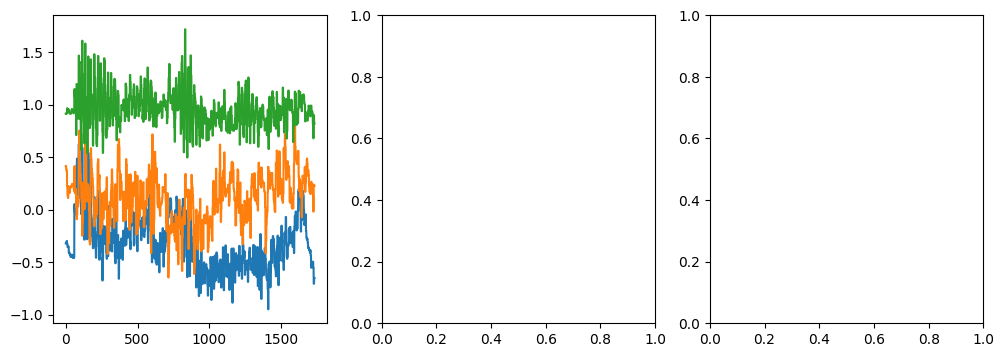

In [8]:
def plot_pedometer(data3D, ax=None):
    """ plot pedometer data
    """
    x = data3D[:, 0]
    y = data3D[:, 1]
    z = data3D[:, 2]

    if not ax:
        plt.figure()
        ax = plt
    ax.plot(x)
    ax.plot(y)
    ax.plot(z)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
plot_pedometer(accel_data, axs[0])
plot_pedometer(user_accel_data, axs[1])
plot_pedometer(gravity_data, axs[2])
axs[0].set_title('total acceleration')
axs[1].set_title('user acceleration')
axs[2].set_title('gravity')
plt.show()

In [91]:
# Segment the data into windows
window_size = 3  # seconds
window_overlap = 1  # seconds
n_samples = user_accel_data.shape[0]
window_samples = int(window_size * 100)
stride_samples = int((window_size - window_overlap) * 100)
n_windows = int((n_samples - window_samples) / stride_samples) + 1

# Extract features and labels for each window
X = []
y = []
for i in range(n_windows):
    start = i * stride_samples
    end = start + window_samples
    window_data = user_accel_data[start:end]
    features = extract_features(window_data)
    label = np.sum(accel_data[start:end, 2] > 9.8)
    X.append(features)
    y.append(label)

# Train a decision tree model on the labeled data
model = DecisionTreeRegressor()
model.fit(X, y)

# Apply the model to new data
n_samples = user_accel_data.shape[0]
window_samples = int(window_size * 100)
stride_samples = int((window_size - window_overlap) * 100)
n_windows = int((n_samples - window_samples) / stride_samples) + 1
step_count = 0
for i in range(n_windows):
    start = i * stride_samples
    end = start + window_samples
    window_data = user_accel_data[start:end]
    features = extract_features(window_data)
    predicted_label = model.predict([features])[0]
    step_count += predicted_label

print('Total steps:', step_count)

IndexError: invalid index to scalar variable.